## **IMPORTED BOTH THE MANUALLY ANNOTATED REVIEWS, THE PYTHON-ANNOTATED REVIEWS, AND MERGED INTO ONE DATAFRAME FOR EXPLORATORY ANALYSIS & MODEL BUILDING**




In [ ]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from wordcloud import WordCloud
import string
import unicodedata
from textblob import TextBlob
from collections import Counter

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.chunk import RegexpParser
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
manual_annotation = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/web scraping/Manual Annotation done in MS Excel.xlsx',
                                  skiprows=[0], usecols=range(7))

In [ ]:
python_annotation = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/web scraping/df2 python annotated reviews.xlsx')

In [ ]:
merged_annotation = pd.concat([manual_annotation, python_annotation], ignore_index=True)

In [ ]:
merged_annotation

,REVIEWS,HAPPINESS,SADNESS,ANGER,FEAR,DISGUST,NO EMOTION
0,ordered lamb shank tuna salad bowl fish,0,0,0,0,0,1
1,fish salad were delicious tasty,1,0,0,0,0,0
2,lamb shank wasnt good complained and they retu...,0,1,0,0,0,0
3,they feed turkey tea desert for complementary,0,0,0,0,0,1
4,great service,1,0,0,0,0,0
...,...,...,...,...,...,...,...
23453,every time we order from kings norton mcdonald...,0,0,0,0,0,1
23454,the most recent order was missing chicken nugg...,0,1,0,0,0,0
23455,for a company of such high standards the servi...,0,0,0,0,0,1
23456,i think the food standards should know about t...,0,1,0,0,0,0


In [ ]:
merged_annotation.describe()

,HAPPINESS,SADNESS,ANGER,FEAR,DISGUST,NO EMOTION
count,23458.000000,23458.000000,23458.000000,23458.000000,23458.000000,23458.000000
mean,0.300409,0.426976,0.027325,0.006650,0.045784,0.193665
std,0.458446,0.494649,0.163033,0.081279,0.209021,0.395178
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
merged_annotation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23458 entries, 0 to 23457
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   REVIEWS     23458 non-null  object
 1   HAPPINESS   23458 non-null  int64 
 2   SADNESS     23458 non-null  int64 
 3   ANGER       23458 non-null  int64 
 4   FEAR        23458 non-null  int64 
 5   DISGUST     23458 non-null  int64 
 6   NO EMOTION  23458 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [ ]:
emotion_statistics = merged_annotation.iloc[:, 1:].sum()
emotion_statistics

HAPPINESS      7047
SADNESS       10016
ANGER           641
FEAR            156
DISGUST        1074
NO EMOTION     4543
dtype: int64

In [ ]:
labels = ['HAPPINESS', 'SADNESS', 'ANGER', 'FEAR', 'DISGUST', 'NO EMOTION']
sizes = [emotion_statistics[label] for label in labels]
colors = ['gold', 'thistle', 'red', 'blue', 'saddlebrown', 'gray']

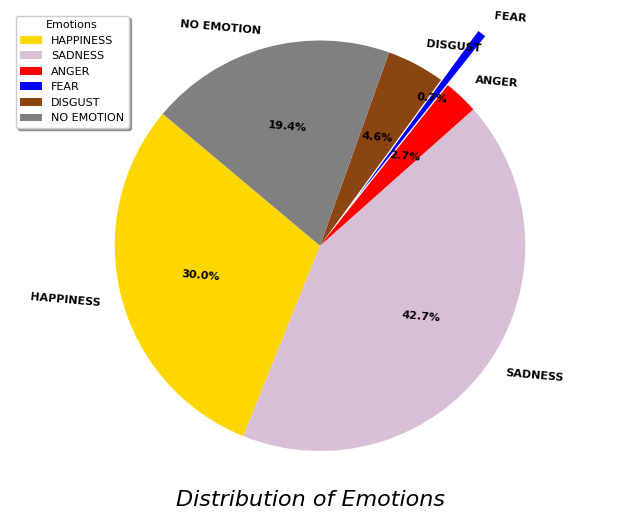

In [ ]:
plt.figure(figsize=(8, 6))
explode = (0, 0, 0, 0.3, 0, 0)
plt.pie(emotion_statistics, labels=emotion_statistics.index, colors=colors, autopct='%1.1f%%', startangle=140,
        explode = explode, textprops= {'fontweight': 'bold', 'fontsize': 8, 'rotation': -5})
plt.suptitle('Distribution of Emotions', y = 0.08, fontsize= 16, fontweight = 14, fontstyle = 'italic')
plt.legend(loc='upper left', fontsize=8, title='Emotions', title_fontsize='8', fancybox=True, shadow=True)
plt.axis('equal')
plt.show()


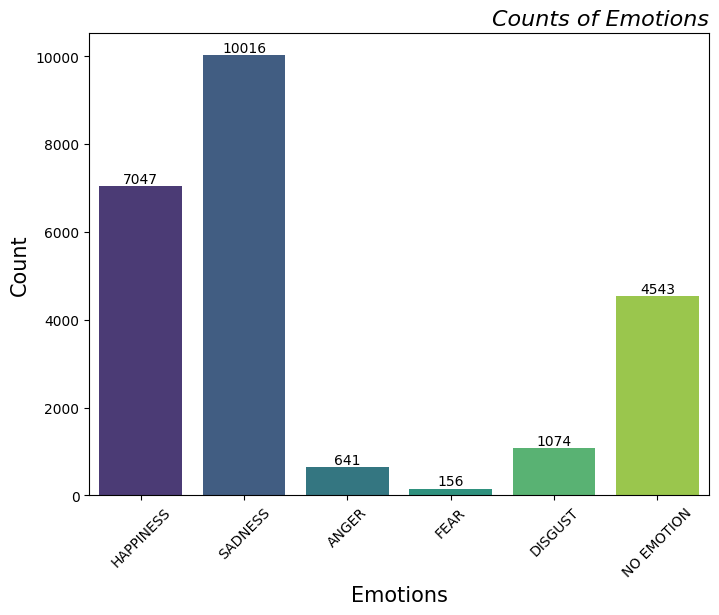

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=sizes, hue=labels, palette='viridis')
plt.title('Counts of Emotions', fontsize= 16, fontweight = 14, fontstyle = 'italic', loc='right')
plt.xlabel('Emotions', fontsize=15)
plt.ylabel('Count', fontsize=15)
for i in range(len(labels)):
  plt.text(i, sizes[i], sizes[i], ha='center', va='bottom')
plt.xticks(rotation=45)
plt.show()

Text(0, 0.5, 'Count')

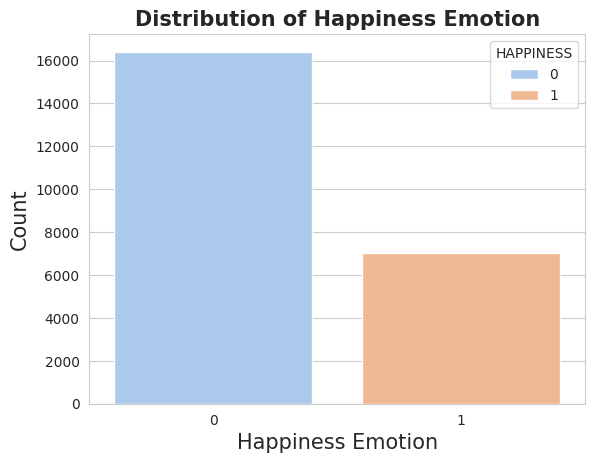

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='HAPPINESS', data=merged_annotation, hue='HAPPINESS', palette='pastel')
plt.title('Distribution of Happiness Emotion', fontweight='bold', fontsize= 15)
plt.xlabel('Happiness Emotion', fontsize=15)
plt.ylabel('Count', fontsize=15)

Text(0, 0.5, 'Count')

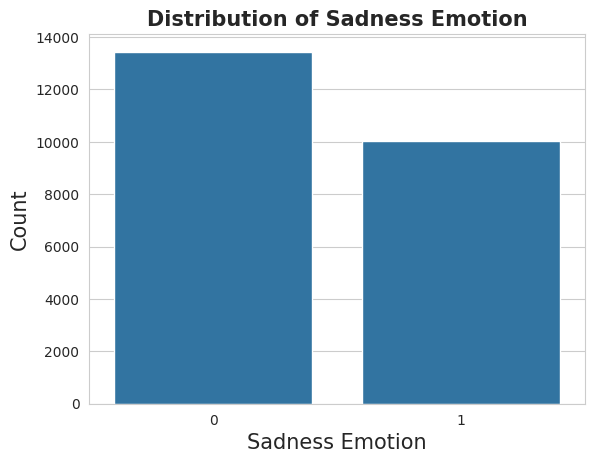

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='SADNESS', data=merged_annotation)
plt.title('Distribution of Sadness Emotion', fontweight='bold', fontsize= 15)
plt.xlabel('Sadness Emotion', fontsize=15)
plt.ylabel('Count', fontsize=15)

Text(0, 0.5, 'Count')

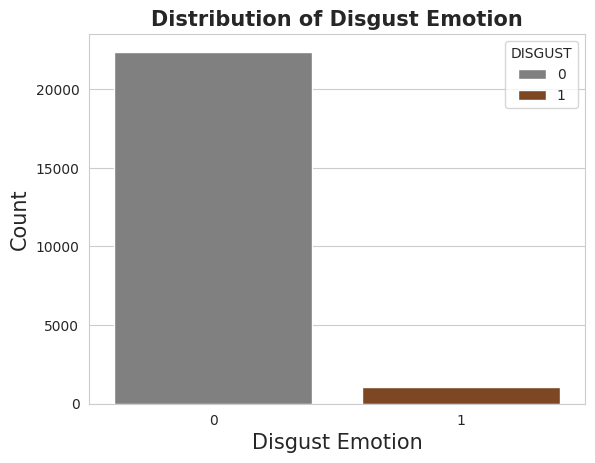

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='DISGUST', data=merged_annotation, hue='DISGUST', palette=['gray','saddlebrown'])
plt.title('Distribution of Disgust Emotion', fontweight='bold', fontsize= 15)
plt.xlabel('Disgust Emotion', fontsize=15)
plt.ylabel('Count', fontsize=15)

In [ ]:
correlation_matrix = merged_annotation.iloc[:, 1:].corr()
correlation_matrix

,HAPPINESS,SADNESS,ANGER,FEAR,DISGUST,NO EMOTION
HAPPINESS,1.000000,-0.565653,-0.109833,-0.053617,-0.143538,-0.320440
SADNESS,-0.565653,1.000000,-0.144682,-0.070629,-0.188257,-0.419989
ANGER,-0.109833,-0.144682,1.000000,-0.013714,-0.036714,-0.077511
FEAR,-0.053617,-0.070629,-0.013714,1.000000,-0.017923,-0.040099
DISGUST,-0.143538,-0.188257,-0.036714,-0.017923,1.000000,-0.106834
NO EMOTION,-0.320440,-0.419989,-0.077511,-0.040099,-0.106834,1.000000


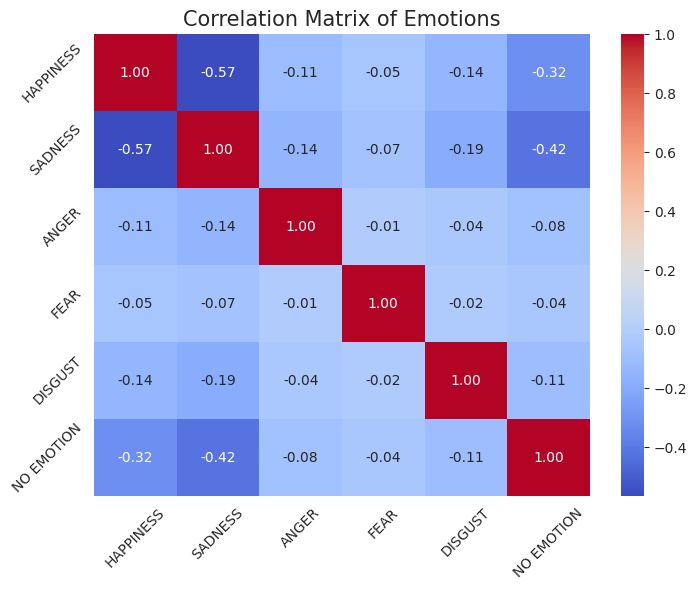

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Correlation Matrix of Emotions', fontsize=15)
plt.show()

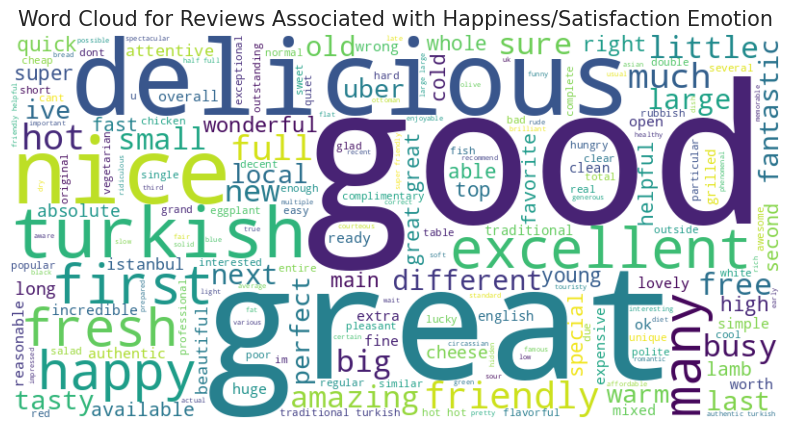

In [ ]:
def extract_happiness_words(review):
    blob = TextBlob(review)
    happiness_words = [word for word, sentiment in blob.tags if sentiment == 'JJ' and blob.sentiment.polarity > 0]
    return ' '.join(happiness_words)

happiness_reviews = merged_annotation['REVIEWS'].apply(extract_happiness_words)
happiness_reviews_combined = ' '.join(happiness_reviews)

wordcloud = WordCloud(width=800, height=400, background_color='white', random_state=1).generate(happiness_reviews_combined)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Reviews Associated with Happiness/Satisfaction Emotion', fontsize=15)
plt.axis('off')
plt.show()

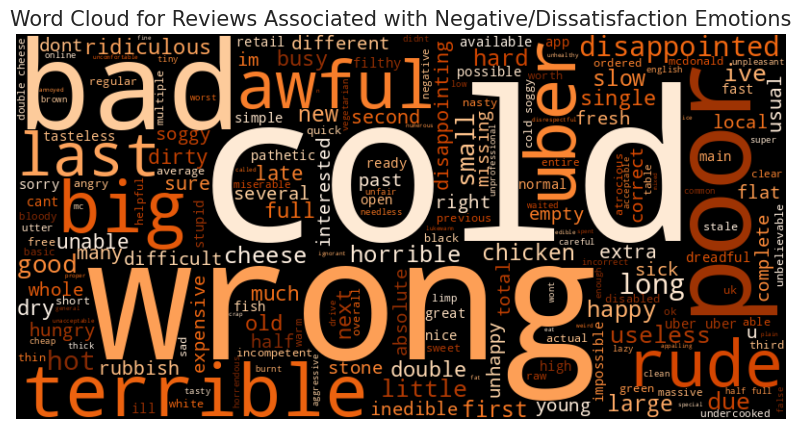

In [ ]:
def extract_negative_words(review):
    blob = TextBlob(review)
    negative_words = [word for word, sentiment in blob.tags if sentiment == 'JJ' and blob.sentiment.polarity <  0]
    return ' '.join(negative_words)

negative_reviews = merged_annotation['REVIEWS'].apply(extract_negative_words)
negative_reviews_combined = ' '.join(negative_reviews)

colormap='Oranges'
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap=colormap, random_state=1).generate(negative_reviews_combined)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Reviews Associated with Negative/Dissatisfaction Emotions', fontsize = 15)
plt.axis('off')
plt.show()


### **MODEL BUILDING**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
print("Class Distribution for Each Emotion:")

for column in merged_annotation.columns[1:]:
  print(sorted(Counter(merged_annotation[column]).items()))

Class Distribution for Each Emotion:
[(0, 16411), (1, 7047)]
[(0, 13442), (1, 10016)]
[(0, 22817), (1, 641)]
[(0, 23302), (1, 156)]
[(0, 22384), (1, 1074)]
[(0, 18915), (1, 4543)]


In [ ]:
import numpy as np

class_counts = {
    "Happiness": 7047,
    "Sadness": 10016,
    "Anger": 641,
    "Fear": 156,
    "Disgust": 1074,
    "No Emotion": 4543
}

max_count = max(class_counts.values())

imbalance_ratios = {emotion: max_count / count for emotion, count in class_counts.items()}
print("Imbalance Ratios for Each Emotion:")
print(imbalance_ratios)

Imbalance Ratios for Each Emotion:
{'Happiness': 1.4213140343408543, 'Sadness': 1.0, 'Anger': 15.625585023400935, 'Fear': 64.2051282051282, 'Disgust': 9.325884543761639, 'No Emotion': 2.2047105436935945}


### **SUPPORT VECTOR CLASSIFIER FOR EMOTIONS IN RESTAURANT REVIEWS**

In [ ]:
custom_stopwords = ['and', 'or', 'but', 'so', 'in', 'on', 'at', 'with', 'by', 'from',
                     'the', 'a', 'an', 'i', 'you', 'me', 'my', 'they', 'we', 'he', 'she',
                     'it', 'is', 'was', 'were', 'are', 'be', 'have', 'has', 'had']

In [ ]:
from sklearn.svm import SVC

X = merged_annotation['REVIEWS']
y = merged_annotation.drop(columns=['REVIEWS', 'NO EMOTION'])

y_single_label = y.idxmax(axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y_single_label, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(stop_words=custom_stopwords)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

svm_classifier = SVC(kernel='linear', class_weight='balanced', random_state=42)
svm_classifier.fit(X_train_tfidf, y_train)

predictions = svm_classifier.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))


Accuracy: 0.8286445012787724
Classification Report:
               precision    recall  f1-score   support

       ANGER       0.45      0.68      0.54       138
     DISGUST       0.80      0.74      0.77       233
        FEAR       1.00      0.38      0.55        32
   HAPPINESS       0.90      0.77      0.83      2286
     SADNESS       0.80      0.92      0.86      2003

    accuracy                           0.83      4692
   macro avg       0.79      0.70      0.71      4692
weighted avg       0.84      0.83      0.83      4692

Confusion Matrix:
 [[  94    2    0   24   18]
 [   9  173    0   36   15]
 [   1    2   12    8    9]
 [  73   29    0 1768  416]
 [  33   11    0  118 1841]]


In [ ]:
print(X_train_tfidf.shape)
print(y_train.shape)
print(X_test_tfidf.shape)
print(y_test.shape)


(18766, 16562)
(18766,)
(4692, 16562)
(4692,)


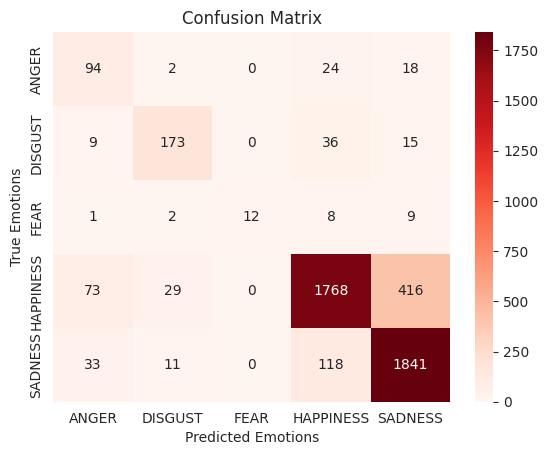

In [ ]:
confusion_matriX = confusion_matrix(y_test, predictions)

emotion_labels = ['ANGER', 'DISGUST', 'FEAR', 'HAPPINESS', 'SADNESS']

sns.heatmap(confusion_matriX, annot=True, fmt='d', cmap='Reds', xticklabels=emotion_labels, yticklabels=emotion_labels)
plt.xlabel('Predicted Emotions')
plt.ylabel('True Emotions')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
predictions

array(['SADNESS', 'HAPPINESS', 'SADNESS', ..., 'HAPPINESS', 'HAPPINESS',
       'HAPPINESS'], dtype=object)

### **TESTING THE MODEL WITH EXTERNAL REVIEWS NOT PART OF THE DATASET**

In [ ]:
raw_review= "I was appalled by the cleanliness of this restaurant. I was irritated. The tables were dirty, the floors were sticky, and there was a foul odor lingering in the air. I couldn't bring myself to eat anything knowing the lack of hygiene in this place."

raw_review_tfidf = vectorizer.transform([raw_review])

raw_review_prediction = svm_classifier.predict(raw_review_tfidf)

print("The emotion I sense is:", raw_review_prediction)

The emotion I sense is: ['DISGUST']


In [ ]:
raw_review= "I had the most delightful dining experience at this restaurant. The ambiance was charming, the staff were incredibly friendly, and the food was absolutely delicious. I left with a big smile on my face"

raw_review_tfidf = vectorizer.transform([raw_review])

raw_review_prediction = svm_classifier.predict(raw_review_tfidf)

print("The emotion I sense is:", raw_review_prediction)

The emotion I sense is: ['HAPPINESS']


In [ ]:
raw_review= "I cannot believe the terrible service I received at this restaurant. The waiter was rude and dismissive, the food took forever to arrive, and when it did, it was cold and tasteless. I will never be returning here again"

raw_review_tfidf = vectorizer.transform([raw_review])

raw_review_prediction = svm_classifier.predict(raw_review_tfidf)

print("The emotion I sense is:", raw_review_prediction)

The emotion I sense is: ['ANGER']
